In [4]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from load_util import load_util
from plot_util import plot_util
from pred_util import pred_util
import os
data_folder = os.path.join('..', 'data')
file_name = "Data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Match Predictor

Goal: Use historic data about matches to predict outcome of future matches. 
Initially, random guessing of outcome from Home Win, Draw or Away win would give 33% accuracy. The goal is to improve this as much as possible.

In [5]:
#Only run to update data file
leagues = ['E0']
start_year, end_year = 2005, 2024
load_util.fetch_data_into_file(data_folder=data_folder, file_name=file_name, start_year=start_year, end_year=end_year, leagues=leagues)

Data fetched and saved to ../data/Data.csv


Load matches into DataFrame

In [6]:
data = load_util.load_data(data_folder, file_name)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,PSH,PSD,PSA
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,16.0,7.0,8.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,14.0,8.0,6.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,13.0,6.0,6.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,11.0,3.0,6.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,11.0,5.0,0.0,2.0,3.0,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,E0,2024-05-19,Crystal Palace,Aston Villa,5.0,0.0,H,2.0,0.0,H,...,8.0,2.0,4.0,1.0,4.0,0.0,0.0,1.83,4.37,3.74
7217,E0,2024-05-19,Liverpool,Wolves,2.0,0.0,H,2.0,0.0,H,...,11.0,10.0,2.0,1.0,1.0,0.0,1.0,1.16,9.27,13.56
7218,E0,2024-05-19,Luton,Fulham,2.0,4.0,A,1.0,2.0,A,...,20.0,4.0,4.0,5.0,4.0,0.0,0.0,2.93,3.92,2.26
7219,E0,2024-05-19,Man City,West Ham,3.0,1.0,H,2.0,1.0,H,...,12.0,11.0,2.0,0.0,1.0,0.0,0.0,1.09,13.11,20.39


Explore distribution of Home Wins, Draws and Away Wins

In [7]:
home_factor, draw_factor, away_factor = data['FTR'].value_counts(normalize=True)['H'], data['FTR'].value_counts(normalize=True)['D'], data['FTR'].value_counts(normalize=True)['A']
home_factor, draw_factor, away_factor

(np.float64(0.45969529085872574),
 np.float64(0.24155124653739612),
 np.float64(0.29875346260387814))

Explore the distribution of goal differences

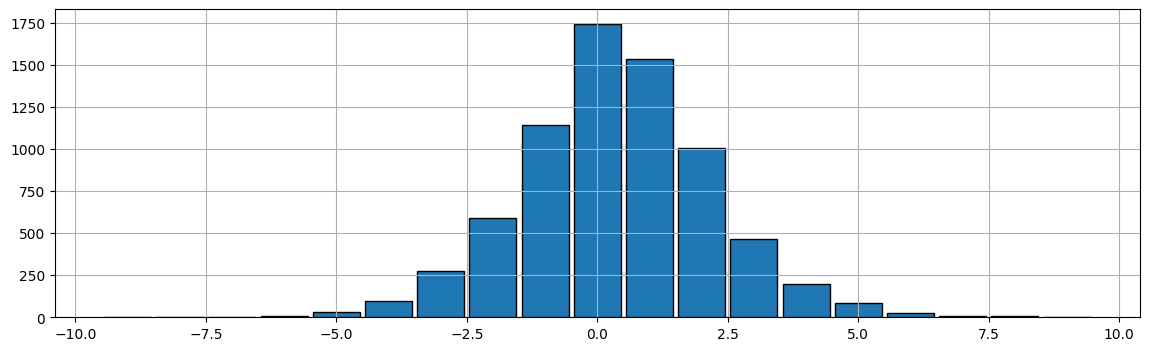

In [8]:
data['Goal difference'] = data['FTHG'] - data['FTAG']
plot_util.plot_histogram(data['Goal difference'], figsize=figsize)
